In [2]:

import math
import numpy as np
import pandas as pd

#chart
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
import scipy.stats as ss
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from collections import Counter




import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')

In [ ]:
df = pd.read_csv ("data\\employee_promotion.csv")
df.head (5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.tail(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


DATA DESCRIPTION

In [5]:
print(f'number of rows {df.shape[0]}')
print(f'number of cols {df.shape[1]}')

number of rows 54808
number of cols 13


In [6]:
df.describe ()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [7]:
df.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

PREPRO

In [8]:
df1 = df.copy()
(df1.isna().sum() / len(df1)) * 100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

FILL NA

In [9]:
# I choose fill with the median to fill numerical variables
df1.age.fillna(df1['age'].median(), inplace=True )

df1.previous_year_rating.fillna(df1['previous_year_rating'].median(),  inplace=True )

df1.avg_training_score.fillna(df1['avg_training_score'].median(), inplace=True )

# # I will use the value more often to fill categorical variables

#df1['education'].value_counts()
df1.education.fillna("Bachelor's", inplace=True )

#drop employee_id because is a unique value to each one employee

df1.drop('employee_id', axis=1, inplace=True)

#Transform genter to binary value
df1['gender'] = df1['gender'].map({'f': 0, 'm': 1}).astype(int)

SPLIT NUMERIC dan CATEGORICAL

In [10]:
df_num = df1.select_dtypes(include=['int64', 'float64'])
df_cat = df1.select_dtypes(exclude=['int64', 'float64'])

EXPLORE analisis data

univariat analisis

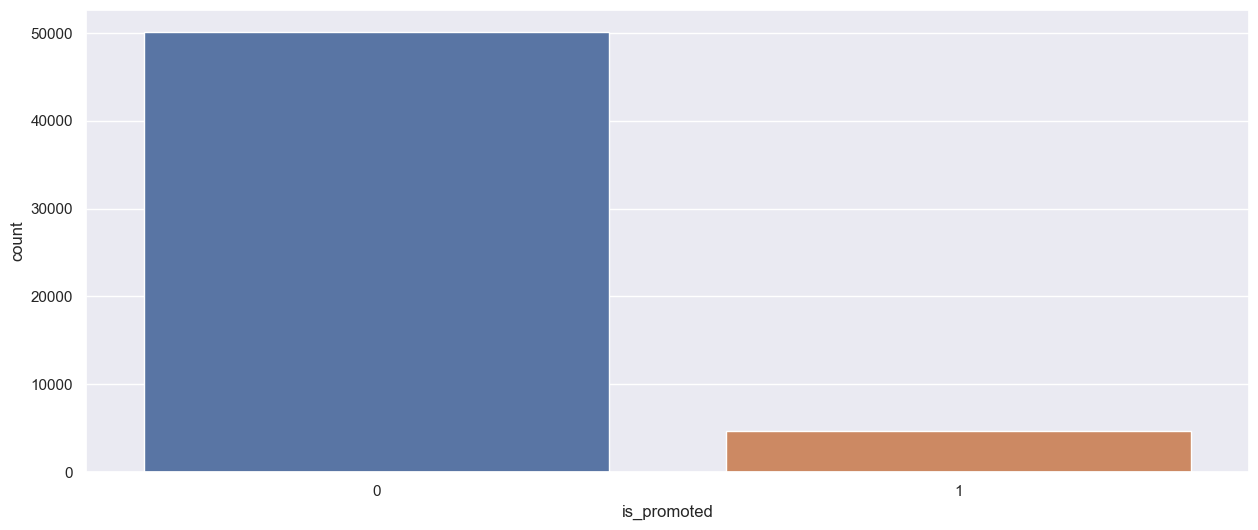

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_promoted', data=df1);

variabel numerik

In [12]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( df_num.apply( np.mean ) ).T
ct2 = pd.DataFrame( df_num.apply( np.median ) ).T
# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( df_num.apply( np.std ) ).T
d2 = pd.DataFrame( df_num.apply( min ) ).T
d3 = pd.DataFrame( df_num.apply( max ) ).T
d4 = pd.DataFrame( df_num.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( df_num.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( df_num.apply( lambda x: x.kurtosis() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,gender,0.0,1.0,1.0,0.702379,1.0,0.457212,-0.885300,-1.216289
1,no_of_trainings,1.0,10.0,9.0,1.253011,1.0,0.609258,3.445434,18.740082
2,age,20.0,60.0,40.0,34.803915,33.0,7.660099,1.007432,0.792353
3,previous_year_rating,1.0,5.0,4.0,3.304481,3.0,1.214759,-0.260858,-0.592811
4,length_of_service,1.0,37.0,36.0,5.865512,5.0,4.265055,1.738061,4.414031
5,awards_won,0.0,1.0,1.0,0.023172,0.0,0.150449,6.338914,38.183220
6,avg_training_score,39.0,99.0,60.0,63.538845,60.0,13.225432,0.465344,-1.030538
7,is_promoted,0.0,1.0,1.0,0.085170,0.0,0.279135,2.972339,6.835049


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

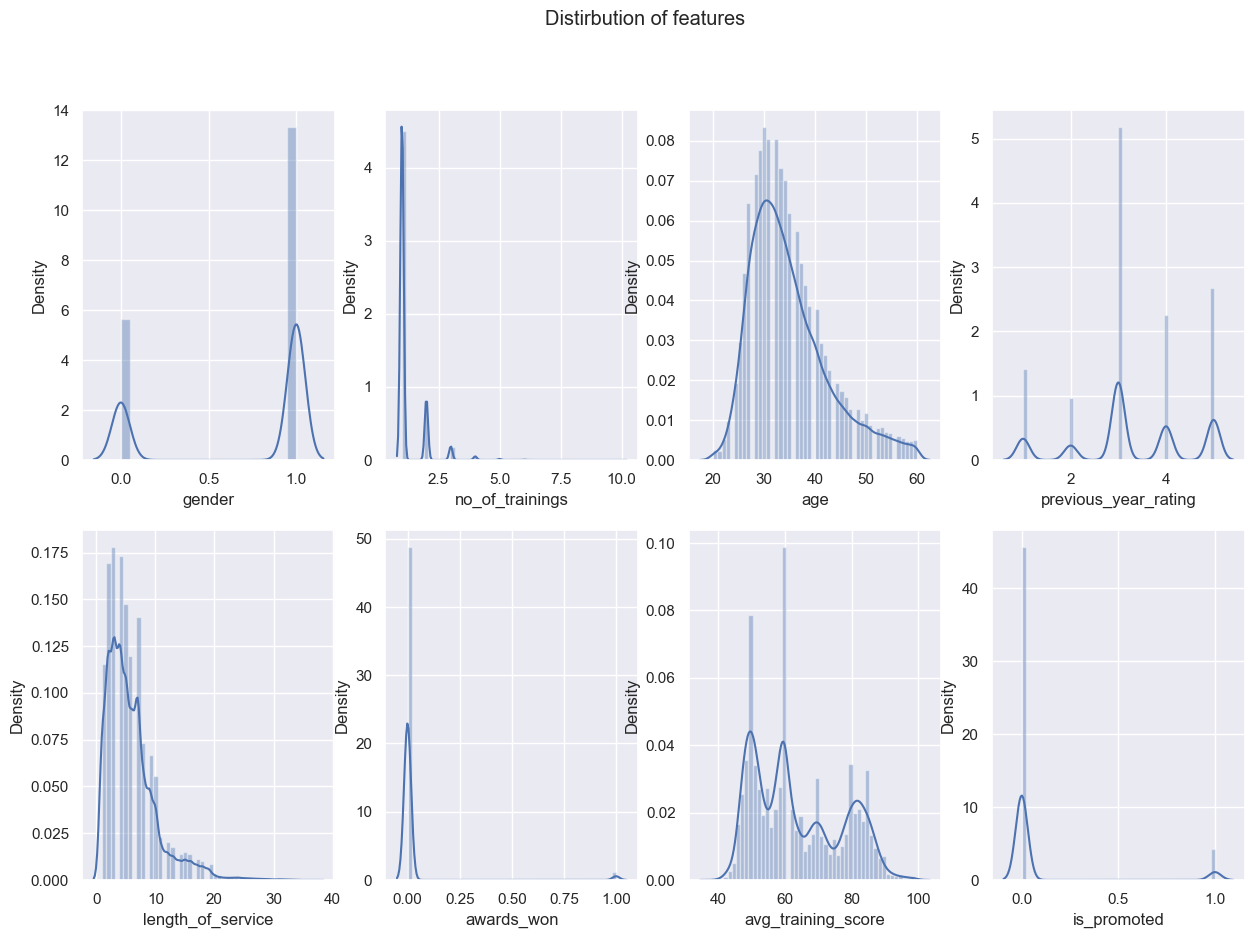

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

for i, feature in enumerate(df_num):
    row = int(i/4)
    col = i%4
    sns.distplot(df_num.iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

variabel kategorik

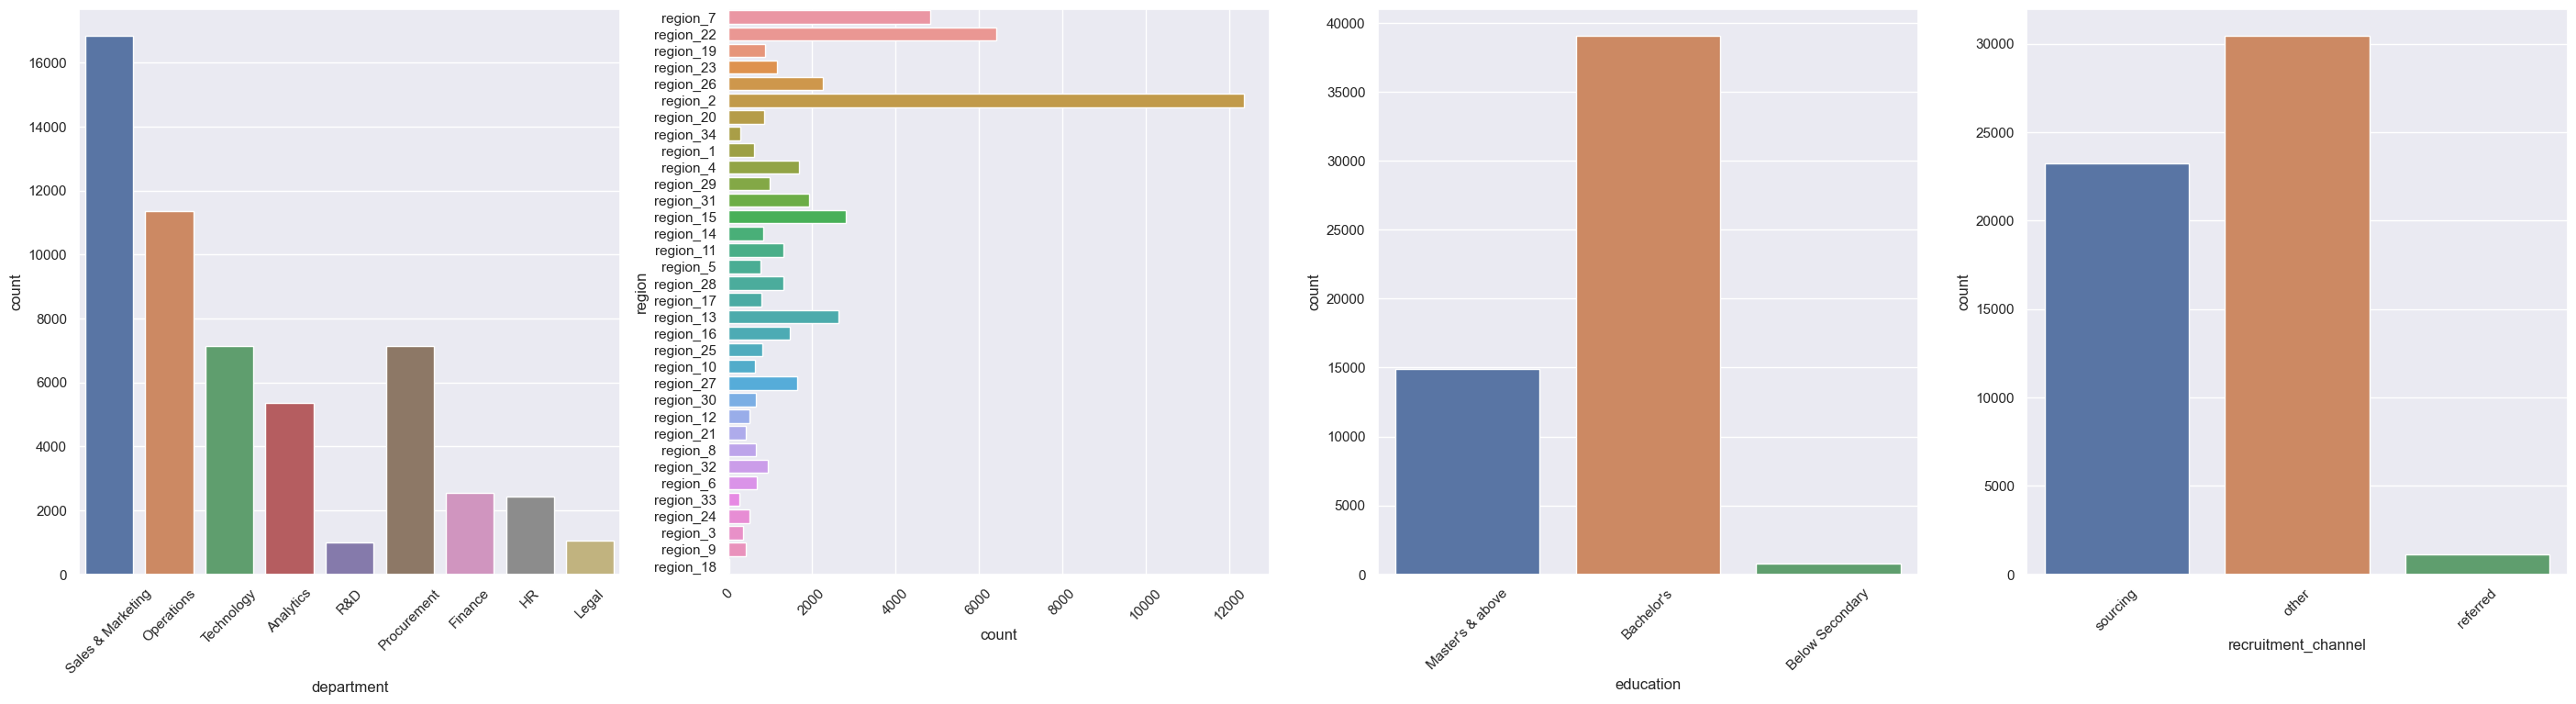

In [14]:
plt.figure(figsize=(35,8));
plt.subplot( 1, 4, 1 );
sns.countplot(x='department', data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 2 );
sns.countplot( y='region',  data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 3 );
sns.countplot( x='education', data=df_cat);
plt.xticks(rotation=45);

plt.subplot( 1, 4, 4 );
sns.countplot( x='recruitment_channel', data=df_cat);
plt.xticks(rotation=45);

analisa bivariat

In [15]:
df1.sample()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
24623,Operations,region_19,Bachelor's,0,sourcing,1,44,5.0,11,0,60.0,0


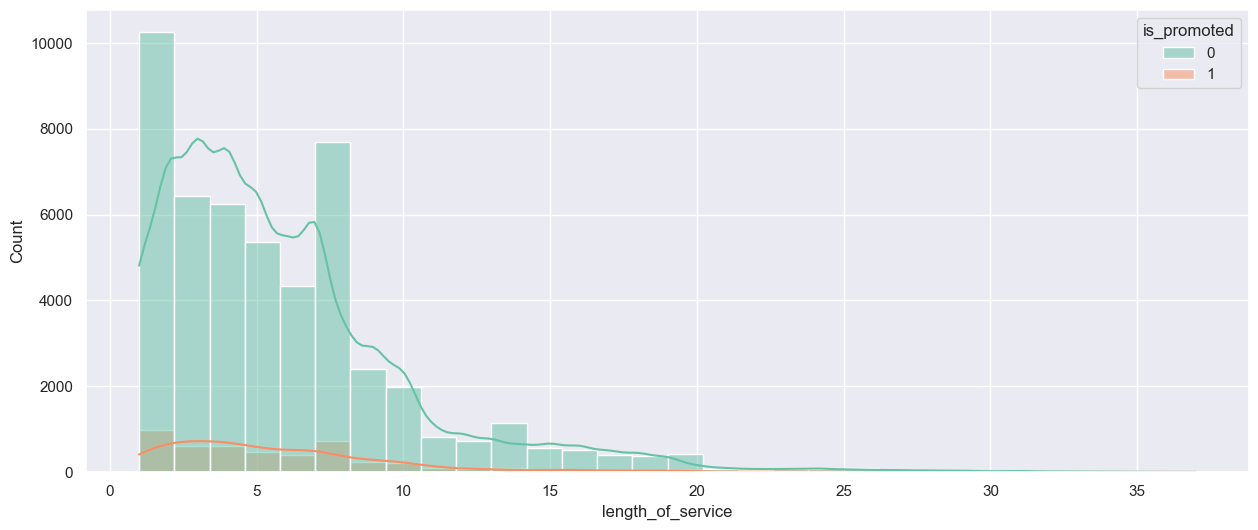

In [16]:
plt.figure(figsize=(15,6))
sns.histplot(x='length_of_service', hue='is_promoted', data=df1, palette='Set2', bins=30, kde=True);

<Axes: xlabel='education', ylabel='count'>

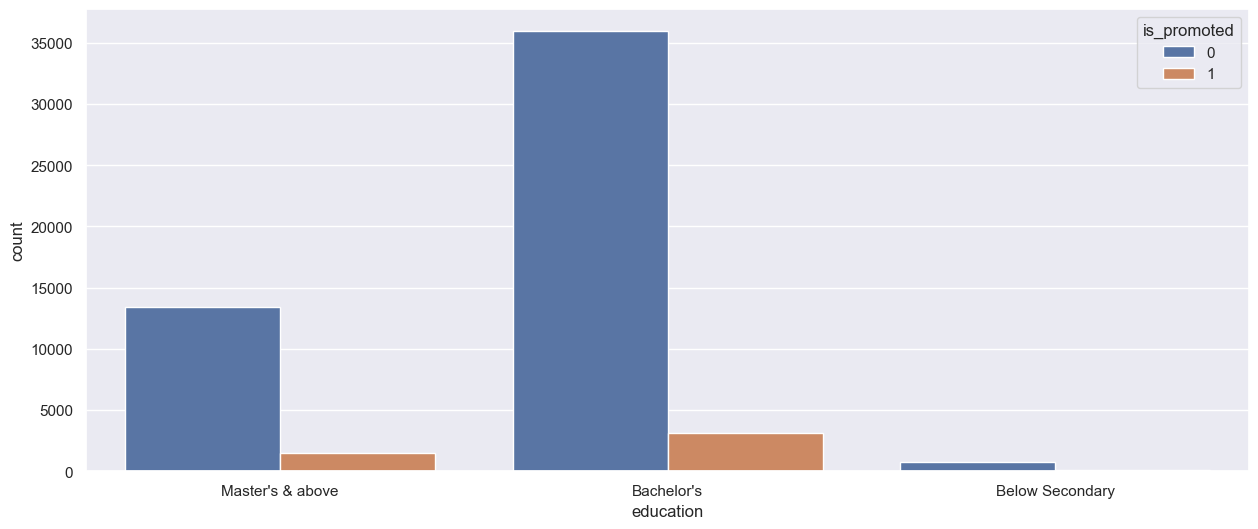

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='education', hue='is_promoted', data=df1)

<Axes: xlabel='age', ylabel='Count'>

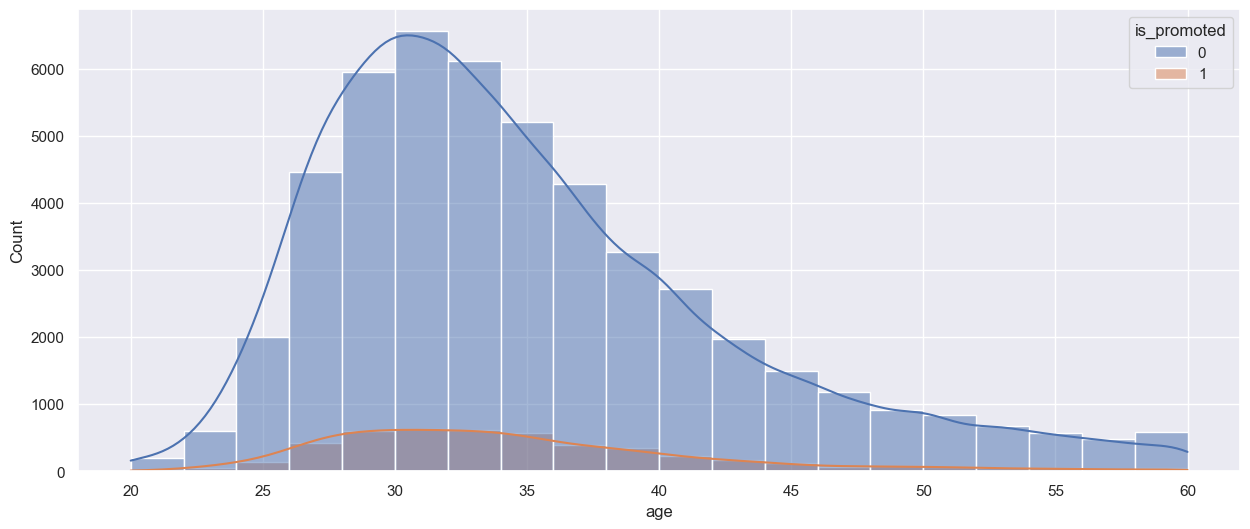

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(x='age', hue='is_promoted', data=df1, bins=20, kde=True)

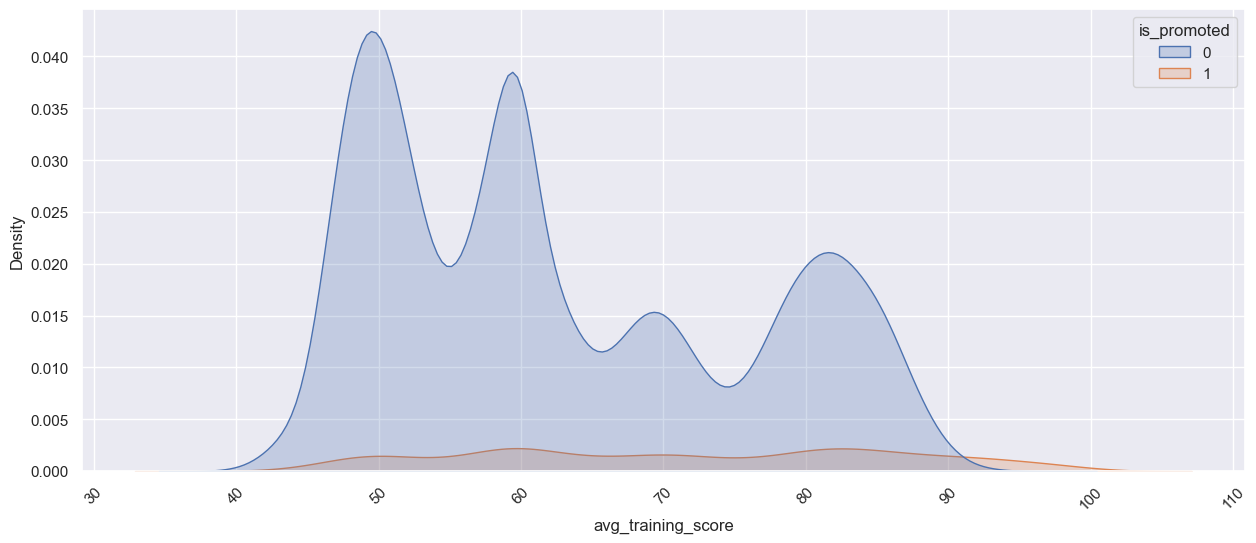

In [19]:
plt.figure(figsize=(15,6))
sns.kdeplot(x='avg_training_score', hue='is_promoted', data=df1, shade=True)
plt.xticks(rotation=45);

analisa multivariate

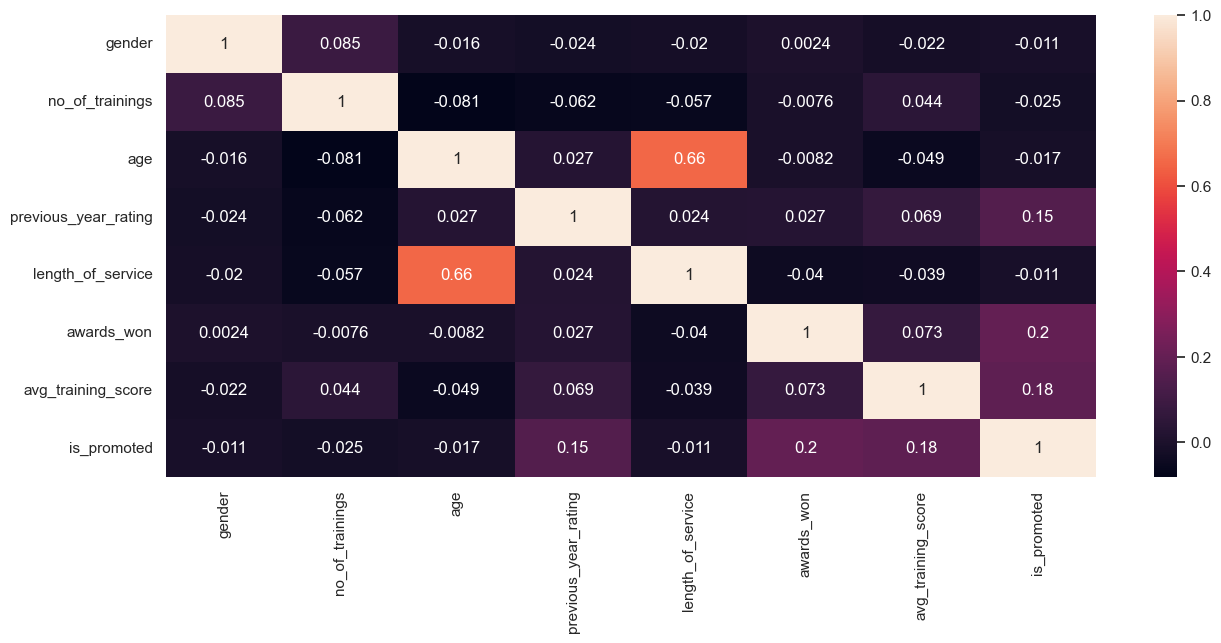

In [20]:
plt.figure(figsize=(15,6))
correlation = df_num.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

CATEGORICAL

Cramer's V statistic allows to understand correlation between two categorical features in one data set.

It is calculated as:

Cramer’s V = √(X2/n) / min(c-1, r-1)

where:

X2: The Chi-square statistic

n: Total sample size

r: Number of rows

c: Number of columns

In [21]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

a = df_cat

a1 = cramers_v(pd.crosstab(a['department'], a["department"]).to_numpy())
a2 = cramers_v(pd.crosstab(a['department'], a["region"]).to_numpy())
a3 = cramers_v(pd.crosstab(a['department'], a["education"]).to_numpy())
a4 = cramers_v(pd.crosstab(a['department'], a["recruitment_channel"]).to_numpy())

a5 = cramers_v(pd.crosstab(a['region'], a["department"]).to_numpy())
a6 = cramers_v(pd.crosstab(a['region'], a["region"]).to_numpy())
a7 = cramers_v(pd.crosstab(a['region'], a["education"]).to_numpy())
a8 = cramers_v(pd.crosstab(a['region'], a["recruitment_channel"]).to_numpy())

a9 = cramers_v(pd.crosstab(a['education'], a["department"]).to_numpy())
a10 = cramers_v(pd.crosstab(a['education'], a["region"]).to_numpy())
a11 = cramers_v(pd.crosstab(a['education'], a["education"]).to_numpy())
a12 = cramers_v(pd.crosstab(a['education'], a["recruitment_channel"]).to_numpy())


a13 = cramers_v(pd.crosstab(a['recruitment_channel'], a["department"]).to_numpy())
a14 = cramers_v(pd.crosstab(a['recruitment_channel'], a["region"]).to_numpy())
a15 = cramers_v(pd.crosstab(a['recruitment_channel'], a["education"]).to_numpy())
a16 = cramers_v(pd.crosstab(a['recruitment_channel'], a["recruitment_channel"]).to_numpy())

# Final dataset
d = pd.DataFrame( {'department': [a1, a2, a3, a4],
'region': [a5, a6, a7, a8],
'education': [a9, a10, a11, a12],
'recruitment_channel': [a13, a14, a15, a16] })
d = d.set_index( d.columns )

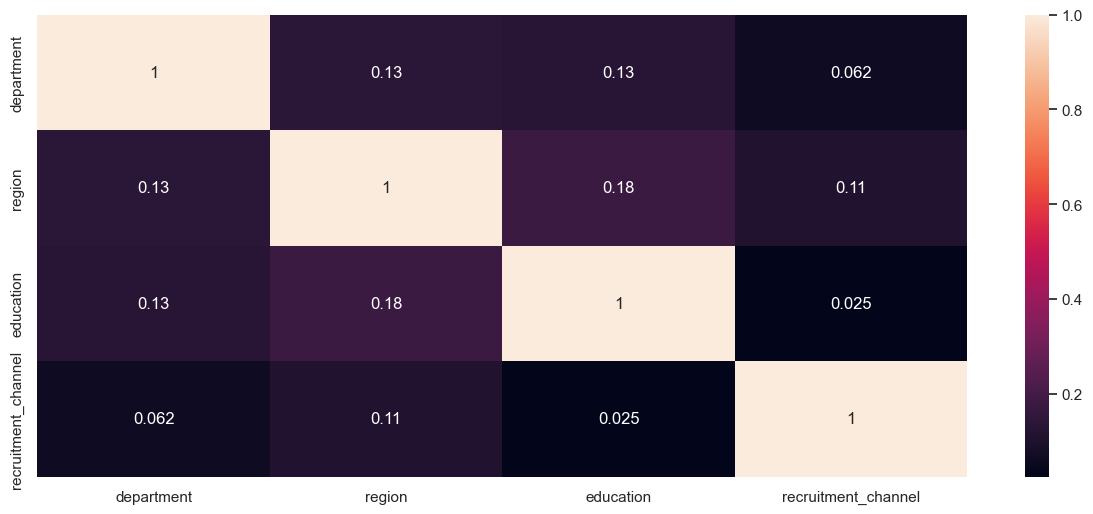

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap( d, annot=True);

In [23]:
dfcat = df_cat.copy()
dfnum = df_num.drop('is_promoted', axis=1)

one hot encoder

In [24]:
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['department',
                             'region',
                             'education',
                             'recruitment_channel'],use_cat_names=True)
# encode the categorical variables
dfcat = OHE.fit_transform(dfcat)

In [25]:
df_all = pd.concat([dfnum, dfcat], axis= 1)

In [26]:
X = df_all.copy()
y = df1['is_promoted']

scaler

In [27]:
#put the values in the same scale.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = df_all.columns)

feature selection

In [28]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X, y, test_size = 0.25)

In [29]:
select_cols = ['avg_training_score', 'age', 'length_of_service','previous_year_rating', 'gender','no_of_trainings','awards_won']
X = X[select_cols]

ROS

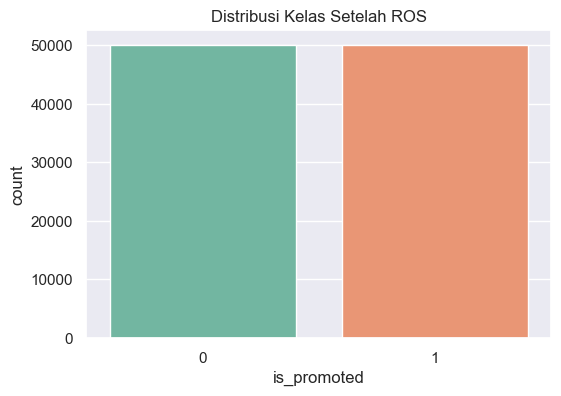

Distribusi data setelah ROS: Counter({0: 50140, 1: 50140})


In [44]:
from imblearn.over_sampling import RandomOverSampler

# Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Visualisasi distribusi setelah ROS
plt.figure(figsize=(6, 4))
sns.countplot(x=y_ros, palette="Set2")
plt.title("Distribusi Kelas Setelah ROS")
plt.show()

print("Distribusi data setelah ROS:", Counter(y_ros))


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=42)

XGBOOST

In [46]:

from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_ros, y_ros)
preds = xgb_cl.predict(X_ros)
print('XGBoost : \n', classification_report(y_ros, preds))
print('XGBoost Accuracy: ', accuracy_score(y_ros, preds))

XGBoost : 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     50140
           1       0.77      0.72      0.75     50140

    accuracy                           0.75    100280
   macro avg       0.76      0.75      0.75    100280
weighted avg       0.76      0.75      0.75    100280

XGBoost Accuracy:  0.7545273234942161


LGBM

In [47]:
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb


lgb_cl = lgb.LGBMClassifier()
lgb_cl.fit(X_ros, y_ros)

# Prediksi
preds_lgb = lgb_cl.predict(X_ros)

# Menampilkan classification report
print('LightGBM : \n', classification_report(y_ros, preds_lgb))

# Menampilkan akurasi
print('LightGBM Accuracy: ', accuracy_score(y_ros, preds_lgb))


[LightGBM] [Info] Number of positive: 50140, number of negative: 50140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 100280, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM : 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     50140
           1       0.75      0.66      0.71     50140

    accuracy                           0.72    100280
   macro avg       0.73      0.72      0.72    100280
weighted avg       0.73      0.72      0.72    100280

LightGBM Accuracy:  0.7225169525329078
